In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Random Forest Regressor

In [2]:
from sklearn.datasets import load_boston
data = load_boston()

In [3]:
feature_names = data.feature_names
X = data.data
y = data.target
N, d = X.shape

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
N_train, = y_train.shape
N_test,  = y_test.shape
print(N_train, N_test)

379 127


In [5]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [6]:
MSE_train = np.mean((rf_model.predict(X_train) - y_train)**2)
MSE_test  = np.mean((rf_model.predict(X_test ) - y_test )**2)
print(MSE_train, MSE_test)

1.68553287335 14.4891311102


## Значимость признаков

In [7]:
rf_model = ensemble.RandomForestRegressor(n_estimators = 100)
rf_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [8]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[:-(d + 1):-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. %7s: %f" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1.      RM: 0.415663
 2.   LSTAT: 0.391256
 3.     DIS: 0.064457
 4.    CRIM: 0.033391
 5.     NOX: 0.025700
 6. PTRATIO: 0.015889
 7.     TAX: 0.015622
 8.     AGE: 0.014139
 9.       B: 0.011327
10.   INDUS: 0.006110
11.     RAD: 0.004754
12.      ZN: 0.000849
13.    CHAS: 0.000841


(-1, 13L)

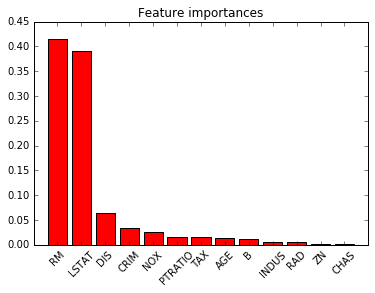

In [9]:
plt.title("Feature importances")
plt.bar(range(d), importances[indices], align = 'center', color = 'r')
plt.xticks(range(d), np.array(feature_names)[indices], rotation = 45)
plt.xlim([-1, d])

 # Некоторые алгоритмы для решения задачи восстановления регрессии в `Scikit-Learn`
 
 Метод    |  Класс
----------|---------------------------------------------         
 kNN      | `sklearn.neighbors.KNeighborsRegressor`
 Linear   | `sklearn.linear_model.LinearRegression`
 SVR      | `sklearn.svm.SVR`
 Tree     | `sklearn.tree.DecisionTreeRegressor`
 RF       | `sklearn.ensemble.RandomForestRegressor`
 AdaBoost | `sklearn.ensemble.AdaBoostRegressor`
 GBT      | `sklearn.ensemble.GradientBoostingRegressor`
 


  Методы класса               | kNN | Linear | SVR | Tree | RF | AdaBoost | GBT     
------------------------------|-----|--------|-----|------|----|----------|------
 `fit(X, y)`                  |  +  |    +   |  +  |  +   | +  |    +     |  +
 `predict(X)`                 |  +  |    +   |  +  |  +   | +  |    +     |  +
 `score(X, y)`                |  +  |    +   |  +  |  +   | +  |    +     |  +
 `decision_function(X)`       |     |    +   |  +  |      |    |    +     |  +
 `transform(X)`               |     |        |     |  +   | +  |          |  +
 `staged_decision_function(X)`|     |        |     |      |    |          |  +
 `staged_predict(X)`          |     |        |     |      |    |    +     |  +
 `staged_score(X, y)`         |     |        |     |      |    |    +     |  +
 `set_params(**params)`       |  +  |    +   |  +  |  +   | +  |    +     |  +
 `get_params()`               |  +  |    +   |  +  |  +   | +  |    +     |  +


